# Notebook-3

### Contents

Reading an SVG file and convert it to csv format.

Colorizing nodes as a function of an attribute on plots.

Computing closeness centrality recycling your own BFS function.

Computing betweenness centrality taking advance of nx.all_shortest_paths() function.

Obtaining eigenvector-based centrality taking advance of nx.eigenvector_centrality_numpy() function.

# 1. Loading, visualizing and saving networks

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Load a network from SVG file with the best node positioning

We can retrive a network from a graph stored in SVG format. SVG format (XML kind) is directly visualizable by many kind of applications (e.g., internet browsers, draw and office apps). The position of every node in the plane is specified.

Have a look at the syntax and contents of the test input SVG file (see next cell).

In [2]:
# BeautifulSoup is a Python library for pulling data out of HTML and XML files

from bs4 import BeautifulSoup

def Graph_from_SVG(stream):

    G=nx.Graph()
    
    attrs = {
        "line" :  ["x1","y1","x2","y2"]
    }
    op = open(stream,"r")
    xml = op.read()
    soup = BeautifulSoup(xml)
    
    count=0
    node_diz={}
    pos={}
    for attr in attrs.keys():
        tmps = soup.findAll(attr)
        for t in tmps:
            node1=(t['x1'],t['y1'])
            node2=(t['x2'],t['y2'])
            if not node1 in node_diz:
                node_diz[node1]=str(count)
                pos[str(count)]=(float(node1[0]),float(node1[1]))
                count+=1
            if not node2 in node_diz:
                node_diz[node2]=str(count)
                pos[str(count)]=(float(node2[0]),float(node2[1]))
                count+=1
            G.add_edge(node_diz[node1],node_diz[node2])
    #save the graph in an edge list format
    nx.write_edgelist(G, "./data/test_graph.dat",data=False)
    
    return G,pos

## Example of plotting and saving a network

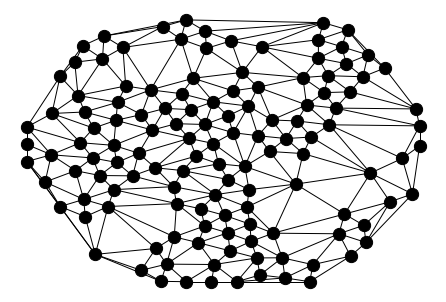

In [3]:
# Getting the network from a SVG file
file="./data/test_graph.svg"
(G,pos)=Graph_from_SVG(file)

# Plot the optimal node distribution (according to the nx understanding)
nx.draw(G, pos, node_size = 150, node_color='black')

# Save the graph on a PNG file
plt.savefig("./data/test_graph.png", dpi=200)

## Graph visualization function

Use this function to draw a graph with centrality-to-node mapping using grayscale color

In [4]:
# Graph visualization with attribute-to-node mapping using grayscale color

def visualize_graph(G, pos, attrib):

    l=[]
    for n in G.nodes():
        l.append(attrib[n])
    max_l=max(l)
    min_l=min(l)
    
    nx.draw_networkx_edges(G, pos)
    
    for n in G.nodes():
        color = str( (attrib[n]-min_l)/(max_l-min_l) ) 
        nx.draw_networkx_nodes(G, {n:pos[n]}, [n], node_size = 100, node_color = color)

# 2. Computing centrality measures

## Degree Centrality

[('0', 5), ('1', 4), ('2', 7), ('3', 7), ('4', 5), ('5', 5), ('6', 7), ('7', 5), ('8', 7), ('9', 6), ('10', 6), ('11', 6), ('12', 6), ('13', 5), ('14', 7), ('15', 5), ('16', 3), ('17', 6), ('18', 5), ('19', 6), ('20', 7), ('21', 6), ('22', 4), ('23', 4), ('24', 7), ('25', 6), ('26', 4), ('27', 7), ('28', 6), ('29', 6), ('30', 6), ('31', 8), ('32', 6), ('33', 7), ('34', 6), ('35', 6), ('36', 5), ('37', 5), ('38', 4), ('39', 7), ('40', 6), ('41', 6), ('42', 7), ('43', 5), ('44', 5), ('45', 5), ('46', 6), ('47', 6), ('48', 5), ('49', 8), ('50', 5), ('51', 4), ('52', 4), ('53', 6), ('54', 6), ('55', 5), ('56', 4), ('57', 5), ('58', 5), ('59', 6), ('60', 7), ('61', 7), ('62', 4), ('63', 5), ('64', 6), ('65', 7), ('66', 7), ('67', 5), ('68', 5), ('69', 5), ('70', 7), ('71', 6), ('72', 5), ('73', 5), ('74', 3), ('75', 5), ('76', 6), ('77', 6), ('78', 6), ('79', 7), ('80', 7), ('81', 5), ('82', 6), ('83', 4), ('84', 5), ('85', 5), ('86', 5), ('87', 8), ('88', 8), ('89', 5), ('90', 6), ('91', 5

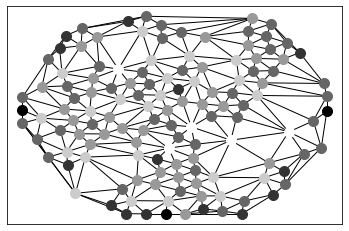

In [5]:
# PUT YOUR CODE HERE

# Obtain degree centrality from NX

# Call to graph visualization and save to a PNG file


## Closeness Centrality

### Function node_distance()
It computes the shortest distance from a root node to every node of the graph by means of Breadth First Search (BFS)

In [1]:
# COPY YOUR BREAD FIRST SEARCH CODE HERE (from notebook-2) 
# AND CONVERT IT IN A FUNCTION NAMED node_distance(G,root_node)

# Compute the shortest distance from root node to every node of the graph (BFS) and return a list_distances


### Compute closeness centrality

{'0': 0.16754617414248044, '1': 0.17208672086720891, '2': 0.18513119533527725, '3': 0.18116975748930125, '4': 0.18065433854907564, '5': 0.17421124828532258, '6': 0.19598765432098794, '7': 0.1759002770083105, '8': 0.2134453781512608, '9': 0.20450885668277002, '10': 0.19155354449472128, '11': 0.21972318339100377, '12': 0.21166666666666697, '13': 0.177871148459384, '14': 0.17912552891396355, '15': 0.177871148459384, '16': 0.170241286863271, '17': 0.18983557548579996, '18': 0.19937205651491394, '19': 0.18786982248520737, '20': 0.2022292993630576, '21': 0.21858864027538757, '22': 0.16302952503209267, '23': 0.1632390745501288, '24': 0.1732605729877219, '25': 0.18955223880597039, '26': 0.16219667943805896, '27': 0.16955941255006698, '28': 0.17663421418637018, '29': 0.19629057187017027, '30': 0.1851311953352772, '31': 0.22359154929577496, '32': 0.2182130584192443, '33': 0.23217550274223062, '34': 0.2170940170940174, '35': 0.23388581952117896, '36': 0.21821305841924424, '37': 0.2208695652173915

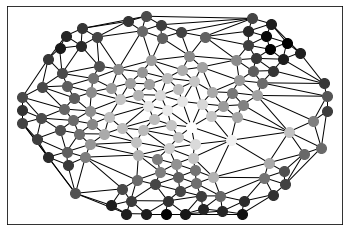

In [7]:
# PUT YOUR CODE HERE

# Compute closeness centrality. You will need to call node_distance(G,root_node)

# Call to graph visualization and save to a PNG file



## Betweenness Centrality

{'2': 237.6515977433331, '5': 54.80351831978913, '1': 11.730122349835227, '3': 498.7365142089155, '6': 451.3446683175475, '9': 386.9627126306923, '10': 203.80336798418304, '7': 418.42532755643725, '14': 425.9201292864707, '16': 136.0711087935184, '4': 73.7533199654651, '17': 219.80961922802385, '18': 105.20154885781317, '19': 255.5530022284829, '12': 331.23263022823653, '13': 109.58258539397595, '22': 48.71127206195786, '23': 164.11349088705745, '24': 310.4192513375107, '26': 103.86912889636284, '25': 284.7057933898028, '8': 748.2959987002316, '29': 154.28599630212778, '28': 168.5156321388088, '11': 487.0767049430252, '21': 450.83983092231887, '32': 344.7602795600943, '33': 762.6347134561041, '36': 65.92881700524315, '34': 162.366173126933, '37': 61.943353980215704, '20': 464.73753754301254, '31': 924.8209035196742, '38': 13.359434263875718, '15': 440.3232937915273, '41': 180.79599387913382, '45': 376.7473369129806, '44': 67.45828777788695, '46': 249.70482311145275, '42': 237.486604049

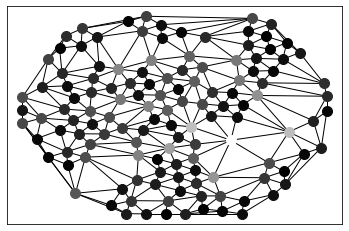

In [8]:
# PUT YOUR CODE HERE

# Compute betweeness centrality

# Call to graph visualization and save to a PNG file


## Eigenvector Centrality

{'0': 0.0482938836851148, '1': 0.04913373385450737, '2': 0.08472212599354975, '3': 0.0613705279013654, '4': 0.06159684359775352, '5': 0.05019745487202478, '6': 0.09751602035048142, '7': 0.04148918177493457, '8': 0.1290612585890477, '9': 0.10755875068828402, '10': 0.08903581693086014, '11': 0.12849915791463118, '12': 0.11017006768904375, '13': 0.058824303662319666, '14': 0.062120068771136475, '15': 0.041971432656106755, '16': 0.024504487365663786, '17': 0.07987018413083294, '18': 0.08504208590285742, '19': 0.0694245368874343, '20': 0.1072878595785926, '21': 0.11886945125257067, '22': 0.03670280199511089, '23': 0.032641188222069385, '24': 0.06521461355944783, '25': 0.088670081019053, '26': 0.03063272139986237, '27': 0.061523773138749904, '28': 0.07844388229340991, '29': 0.09772714960353374, '30': 0.0891735541282316, '31': 0.1625561697066746, '32': 0.12551296832977488, '33': 0.14845581631095403, '34': 0.12855178482609722, '35': 0.14244293983726877, '36': 0.11112382754767552, '37': 0.11522

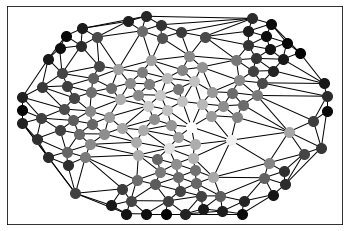

In [9]:
# PUT YOUR CODE HERE

# Obtain eigenvector centrality from NX

# Call to graph visualization and save to a PNG file
